# Data and Plotting with `pandas` and `seaborn`

This assignment will focus on getting data using files and API's.  Your goal is to identify a dataset and explore the dataset to find important characteristics and answer exploratory questions.  

## Example: Coffee Leaf Rust Protection

The USDA provides a number of freely accessible datasets.  One is related to a study on the use of different fungicides to protect against the devastating coffee leaf rust fungus.  Information on the study is given [here](https://www.sciencedirect.com/science/article/pii/S0261219425001619) but the data are fairly straightforward and we needn't worry about the formality of statistical hypothesis tests yet.  

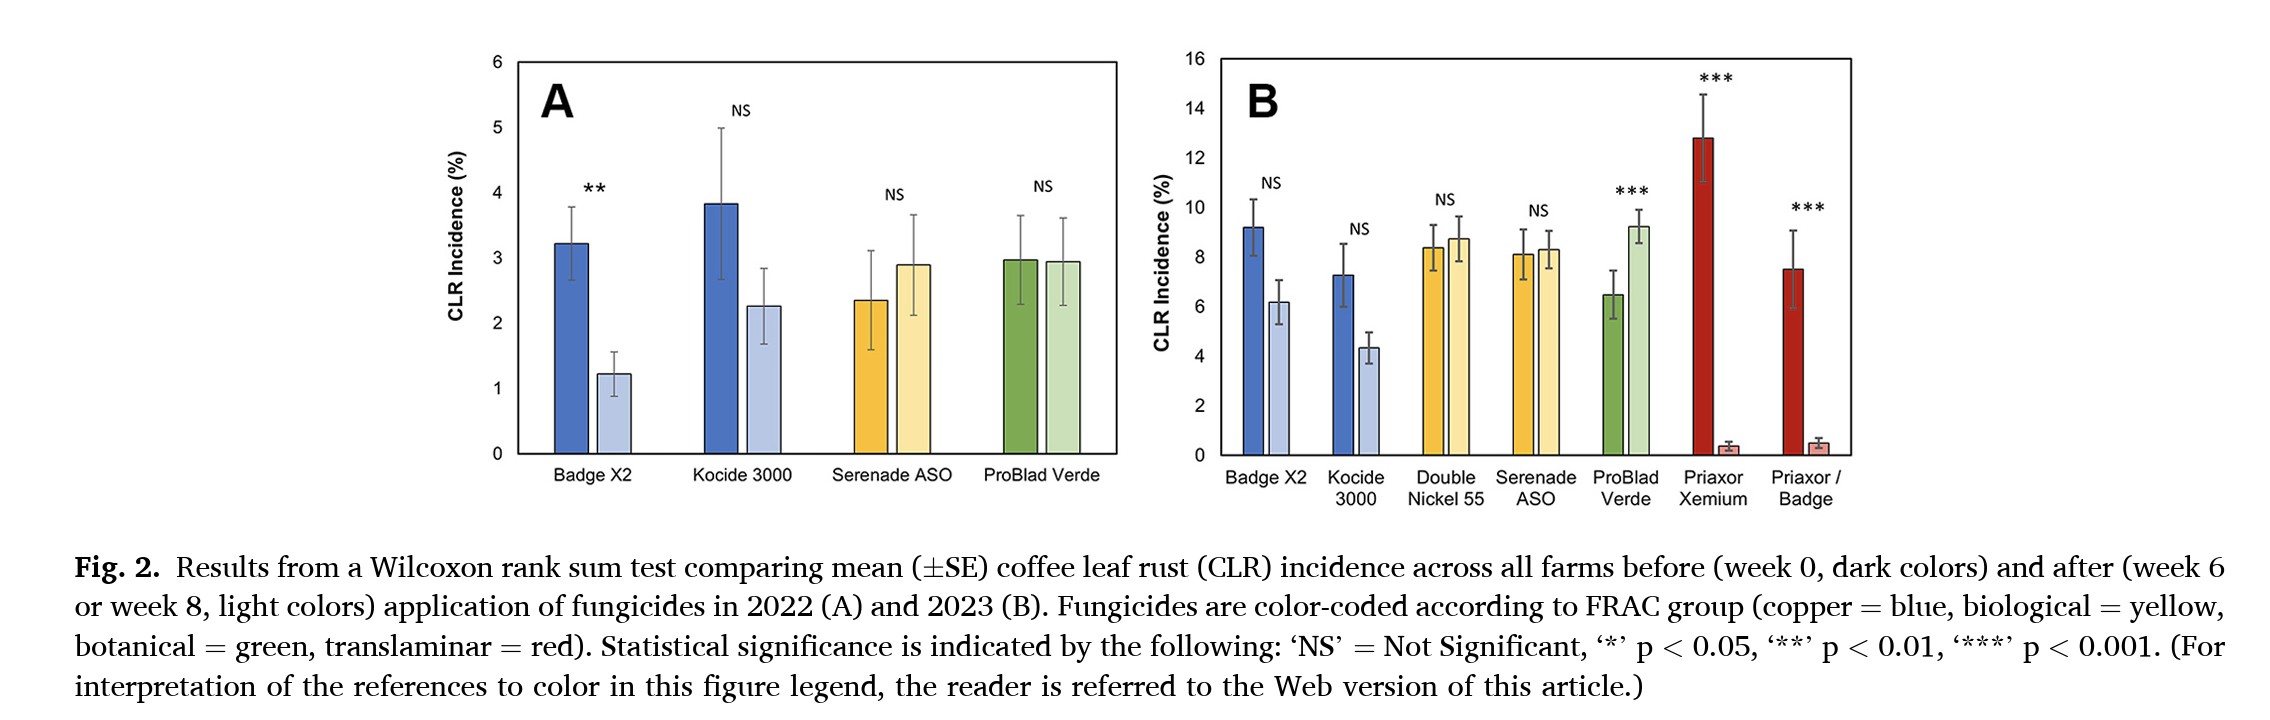

The figure above uses the data to explore the incidence of leaf rust at week 0 vs. week 6 or week 8 by different treatment/fungicide -- figure A is 2022 and B 2023.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
#load the data from my github repo
df = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_spr26/refs/heads/main/data/Fungicides_CLRincidence_leaves.csv')

In [4]:
#look at the first five rows
df.head()

,Year,Farm,Spray,Week,Product,Tree,Incidence,Leaves
0,2022,1,1,0,Badge,1,8.33,12.00
1,2022,1,1,0,Badge,2,1.69,19.67
2,2022,1,1,0,Badge,3,3.70,18.00
3,2022,1,1,0,Badge,4,4.35,15.33
4,2022,1,1,0,Badge,5,4.35,15.33


In [5]:
#select the year 2022
year2022 = df.loc[df['Year'] == 2022]

In [6]:
year2022.head()

,Year,Farm,Spray,Week,Product,Tree,Incidence,Leaves
0,2022,1,1,0,Badge,1,8.33,12.00
1,2022,1,1,0,Badge,2,1.69,19.67
2,2022,1,1,0,Badge,3,3.70,18.00
3,2022,1,1,0,Badge,4,4.35,15.33
4,2022,1,1,0,Badge,5,4.35,15.33


In [7]:
#badge is one product
badge = year2022.loc[year2022['Product'] == 'Badge']

In [8]:
badge.head()

,Year,Farm,Spray,Week,Product,Tree,Incidence,Leaves
0,2022,1,1,0,Badge,1,8.33,12.00
1,2022,1,1,0,Badge,2,1.69,19.67
2,2022,1,1,0,Badge,3,3.70,18.00
3,2022,1,1,0,Badge,4,4.35,15.33
4,2022,1,1,0,Badge,5,4.35,15.33


In [9]:
badge.columns.tolist() #note some spaces in week and incidence

['Year', 'Farm ', 'Spray', 'Week ', 'Product', 'Tree', 'Incidence ', 'Leaves']

In [10]:
#explore the different weeks
badge['Week '].value_counts()

Week 
0     36
1     36
2     36
3     36
4     36
5     36
6     24
7     24
8     24
9     24
10    24
15    24
Name: count, dtype: int64

In [11]:
#subset badge data to only week 0 or week 6
week_0_and_6 = badge.loc[(badge['Week '] == 0) | (badge['Week '] == 6)]

In [12]:
week_0_and_6.head()

,Year,Farm,Spray,Week,Product,Tree,Incidence,Leaves
0,2022,1,1,0,Badge,1,8.33,12.00
1,2022,1,1,0,Badge,2,1.69,19.67
2,2022,1,1,0,Badge,3,3.70,18.00
3,2022,1,1,0,Badge,4,4.35,15.33
4,2022,1,1,0,Badge,5,4.35,15.33


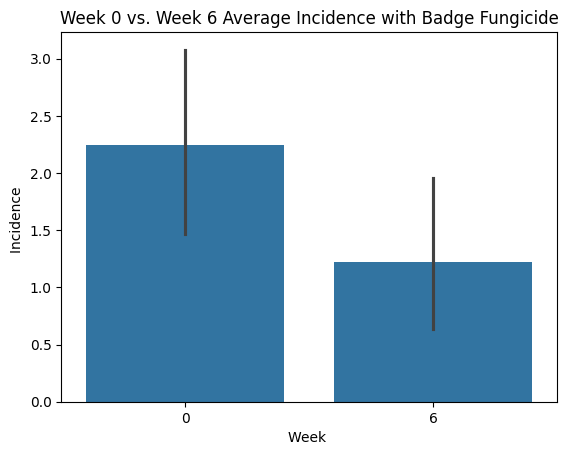

In [13]:
sns.barplot(data = week_0_and_6, x = 'Week ', y = 'Incidence ');
plt.title('Week 0 vs. Week 6 Average Incidence with Badge Fungicide');

In [14]:
#get all the data for week 0 and 6 for all fungicides
week_0_and_6_all = year2022.loc[(year2022['Week '] == 0) | (year2022['Week '] == 6)]

<Axes: xlabel='Product', ylabel='Incidence '>

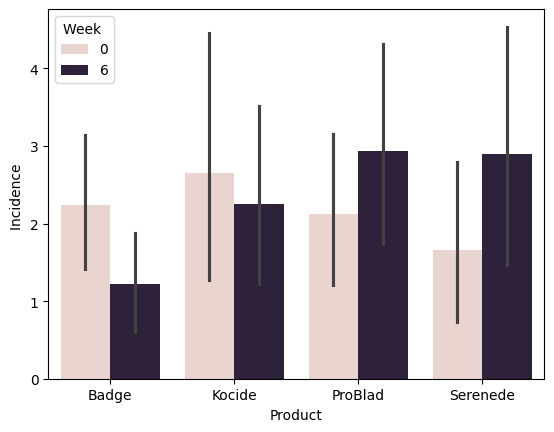

In [15]:
#week 0 vs week 6 for each fungicide
sns.barplot(data = week_0_and_6_all, x = 'Product', y = 'Incidence ', hue = 'Week ')

**PROBLEM**

Can you repeat this for the year 2023?  Which fungicide seems to have made the biggest impact based on your visualizations?

**PROBLEM**

Repeat the exercise above to reproduce another plot from one of the figures (3, 4, or 5) in the research article and write a complete sentence explanation of what the figure shows.

### Finding another example

Use the USDA data catalog [here](https://agdatacommons.nal.usda.gov/browse) or find a different example of a public entity that shares data related to an area of interest to you.  Load in the dataset and create a few plots using seaborn, describing anything interest you find using complete sentence.

### Data with API's

We will explore API's and data much more, for now your goal should be to make a request of a basic API and parse the response.  Below, a few requests are built to get data from the meowfacts api [here](https://github.com/wh-iterabb-it/meowfacts).  

In [16]:
import requests

In [17]:
url = 'https://meowfacts.herokuapp.com/'

In [18]:
r = requests.get(url)

In [19]:
r.json()

{'data': ['Contrary to popular belief, the cat is a social animal. A pet cat will respond and answer to speech , and seems to enjoy human companionship.']}

In [20]:
catdata = r.json()
print(catdata['data'])

['Contrary to popular belief, the cat is a social animal. A pet cat will respond and answer to speech , and seems to enjoy human companionship.']


In [21]:
#all in one place -- adding a count argument
url = 'https://meowfacts.herokuapp.com/?count=5'
r = requests.get(url)
catdata = r.json()
catdata['data']

["Jaguars are the only big cats that don't roar.",
 'Cats have 30 vertebrae--5 more than humans have.',
 'Cats sleep 70% of their lives.',
 'Cats have individual preferences for scratching surfaces and angles. Some are horizontal scratchers while others exercise their claws vertically.',
 'A cat can sprint at about thirty-one miles per hour.']

In [22]:
#getting 3 cat facts in spanish
url = 'https://meowfacts.herokuapp.com/?lang=esp-es&count=3'
r = requests.get(url)
catdata = r.json()
catdata['data']

['La primera exposición felina tuvo lugar en 1871 en el Crystal Palace de Londres.',
 'El antepasado de todos los gatos domésticos es el gato salvaje africano, que aún existe hoy en día.',
 'Cuando está bien tratado, un gato puede vivir veinte años o más, pero la vida media de un gato doméstico es de 14 años.']

Use the list of free api's [here](https://github.com/public-apis/public-apis?tab=readme-ov-file) to locate another basic api and make a few succesful requests that give different kinds of data.  Many of the api's are dead or have bad documentation so don't spend too much time navigating bad documentation and confusing explanations -- just move on to another api.

### Finding data for a small project

Soon, you will be asked to explore a dataset of your own finding to produce a more formal write up of the data and your findings.  See if you can find a resource (not Kaggle) that has data related to an area of interest to you.  Can you easily access the data through an API or data files?  Be ready to share your dataset ideas and any issues you face trying to create a DataFrame or dictionary.